## EDA Section

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace with your actual CSV path or filename
csv_path = "cloud_df.csv"

# Load the dataset
cloud_df = pd.read_csv(csv_path)

# Preview first few rows
cloud_df.head()


,afterHours,close,from,high,low,open,preMarket,status,symbol,volume,pull_time,source_path
0,216.6600,216.75,2024-07-01,217.51,211.92,212.09,211.89,OK,AAPL,60402929.0,2025-05-17,s3://polygon-data-stock/full/AAPL_Q3_2024.json
1,219.4100,220.27,2024-07-02,220.38,215.10,216.15,216.50,OK,AAPL,58046178.0,2025-05-17,s3://polygon-data-stock/full/AAPL_Q3_2024.json
2,221.0800,221.55,2024-07-03,221.55,219.03,220.00,220.00,OK,AAPL,37269801.0,2025-05-17,s3://polygon-data-stock/full/AAPL_Q3_2024.json
3,226.5092,226.34,2024-07-05,226.45,221.65,221.65,221.86,OK,AAPL,59517108.0,2025-05-17,s3://polygon-data-stock/full/AAPL_Q3_2024.json
4,228.3900,227.82,2024-07-08,227.85,223.25,227.09,227.60,OK,AAPL,59085861.0,2025-05-17,s3://polygon-data-stock/full/AAPL_Q3_2024.json


In [3]:
# count missing values in metadata df
print("Missing values in Metadata DF:")
print(cloud_df.isnull().sum())

# Summary statistics
numeric_cols = cloud_df.select_dtypes(include=['number']).columns
summary = cloud_df[numeric_cols].describe()

print("Summary Statistics (numeric only):")
print(summary.to_string())

Missing values in Metadata DF:
afterHours     0
close          0
from           0
high           0
low            0
open           0
preMarket      0
status         0
symbol         0
volume         0
pull_time      0
source_path    0
dtype: int64
Summary Statistics (numeric only):
       afterHours       close        high         low        open   preMarket        volume
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   207.136303  207.205913  208.909997  205.216341  206.951837  206.917262  5.707368e+07
std     25.432000   25.502993   25.581004   25.132710   25.332977   25.307894  3.077656e+07
min    164.400000  165.000000  166.400000  164.075000  165.350000  165.180000  2.323470e+07
25%    183.907500  184.225000  185.135000  182.205000  183.827500  183.732500  4.157360e+07
50%    214.525000  214.265000  216.840000  211.945000  214.310000  214.260000  4.976259e+07
75%    227.405000  227.490000  229.402500  225.220000  227.450000  227.14

In [4]:
# Extract the quarter info (Q1/Q2/Q3/Q4) from the 'source_path' column
cloud_df['quarter'] = cloud_df['source_path'].str.extract(r'Q([1-4])', expand=False)

# Count number of records for each quarter
quarter_counts = cloud_df['quarter'].value_counts().sort_index()

# Display the counts
print("Number of records by quarter:")
print(quarter_counts.to_string())


Number of records by quarter:
quarter
1    61
2    63
3    64
4    64


## Distribution

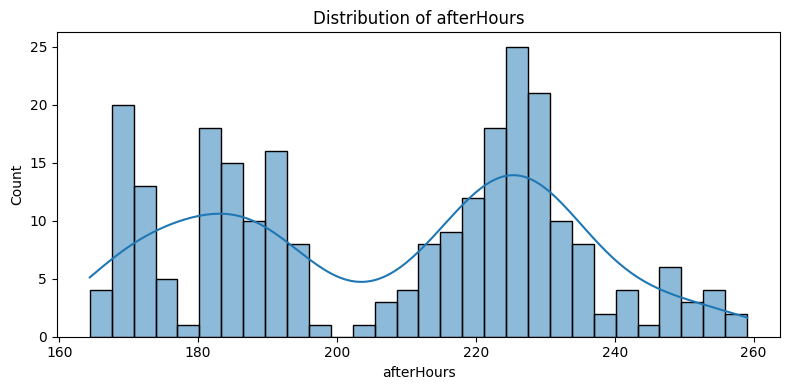

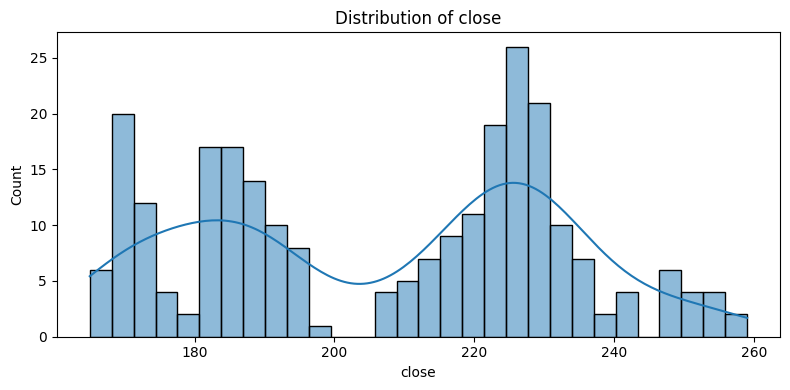

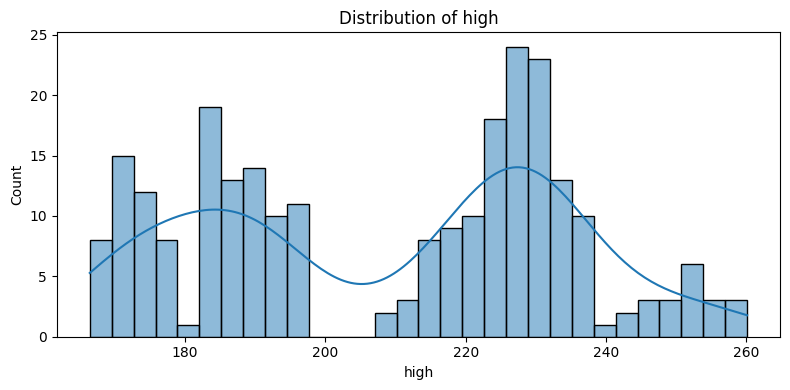

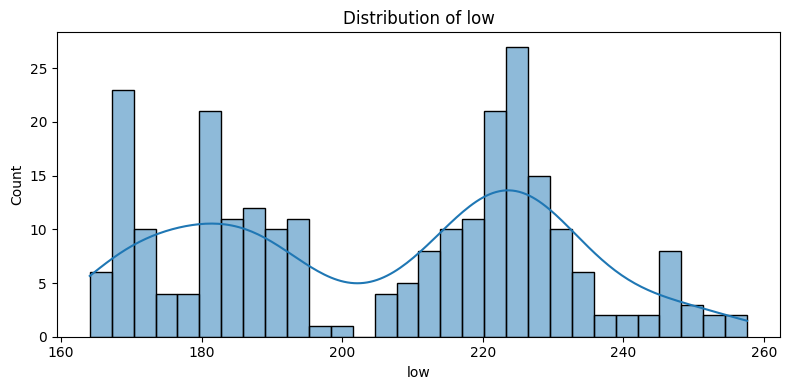

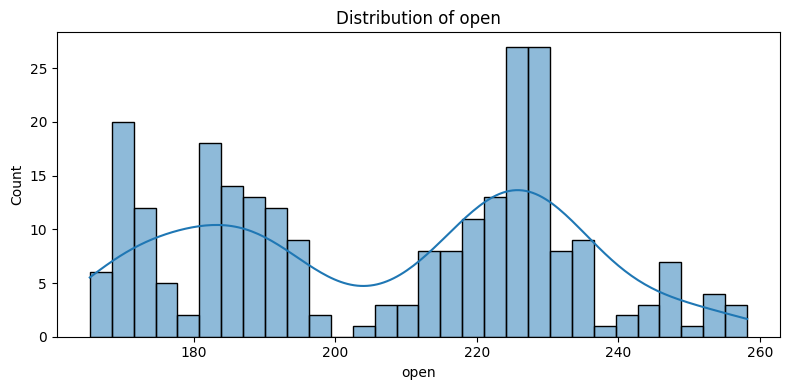

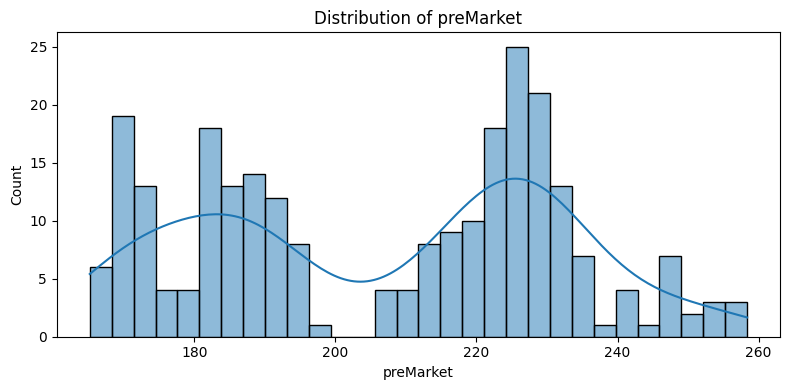

In [5]:
numeric_cols = cloud_df.select_dtypes(include='number').columns

# Plot first 6 numeric features
for col in numeric_cols[:6]:
    plt.figure(figsize=(8, 4))
    sns.histplot(cloud_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


The histograms reveal a clear **bimodal distribution**, with two distinct peaks occurring around the ranges of 175–185 and 220–230. This suggests that the stock may have experienced a regime shift or structural break during the observed period—possibly driven by external market events, earnings announcements, or macroeconomic news. The shapes of distributions are nearly identical, potentially arguing the strong correlation. 

## Correlation Matrix

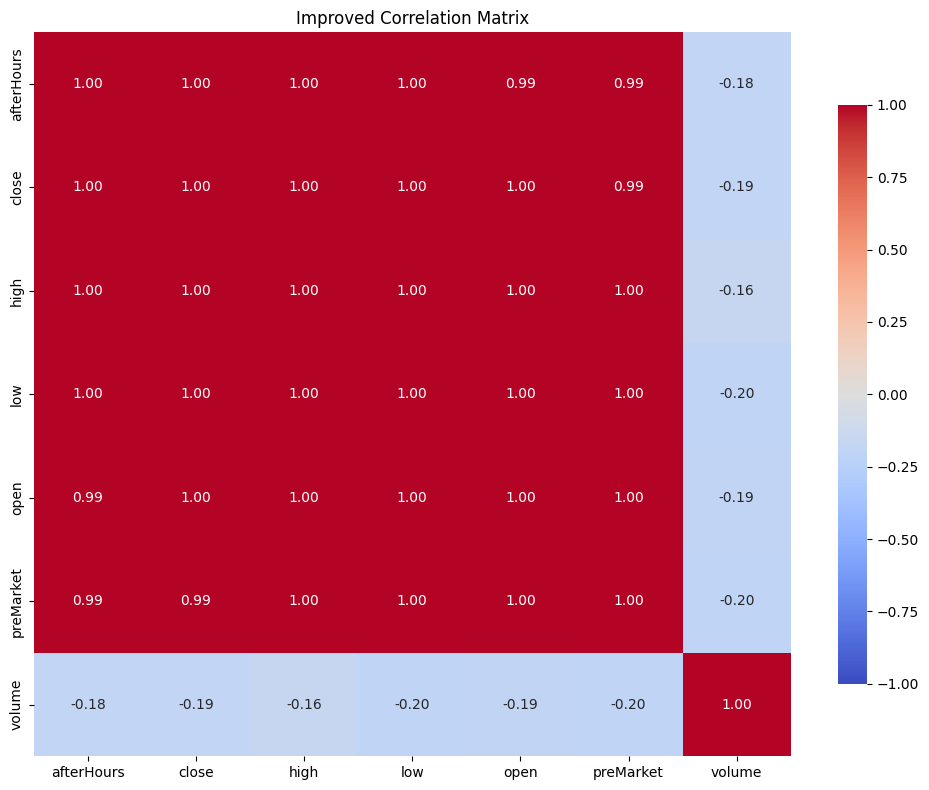

In [6]:
# Compute correlation
corr = cloud_df[numeric_cols].corr()

# Drop perfectly collinear pairs (e.g., open/close)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={"shrink": 0.8})
plt.title("Improved Correlation Matrix")
plt.tight_layout()
plt.show()


The correlation matrix heatmap confirms the patterns observed in the time series plots. All price-related variables (`afterHours`, `close`, `high`, `low`, `open`, and `preMarket`) show extremely high positive correlations with each other, with most coefficients equal to or very close to 1. This indicates these features move almost identically over time. In contrast, `volume` has weak negative correlations with all price variables, ranging from -0.16 to -0.20, suggesting it behaves independently and is not linearly related to price movements. These findings reinforce the visual observations and highlight multicollinearity concerns among price features.


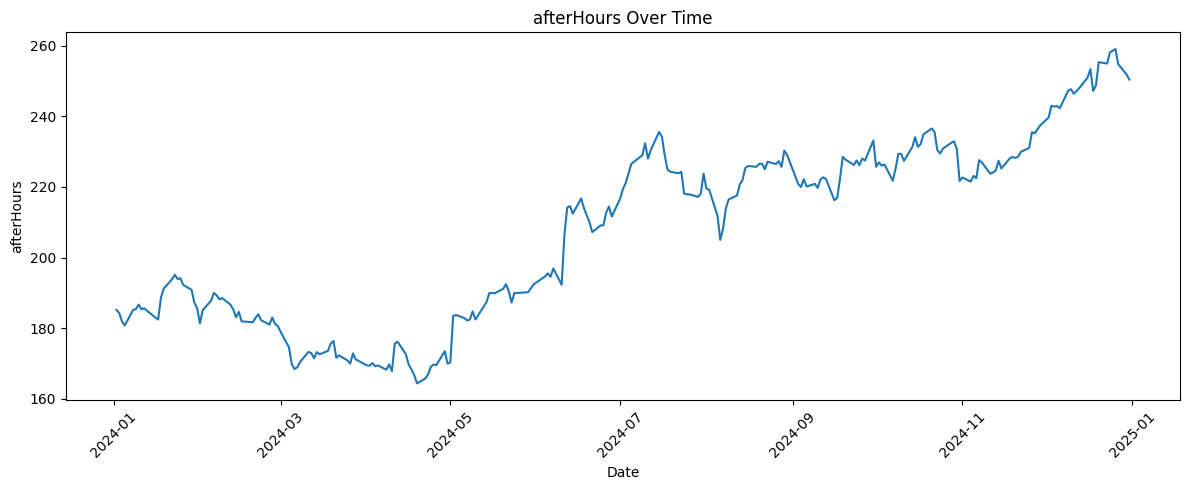

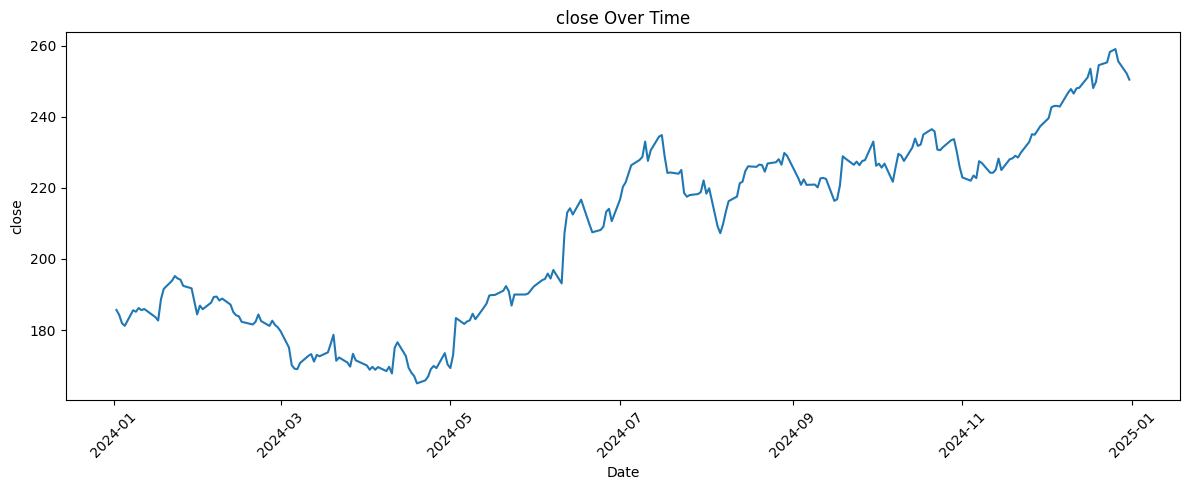

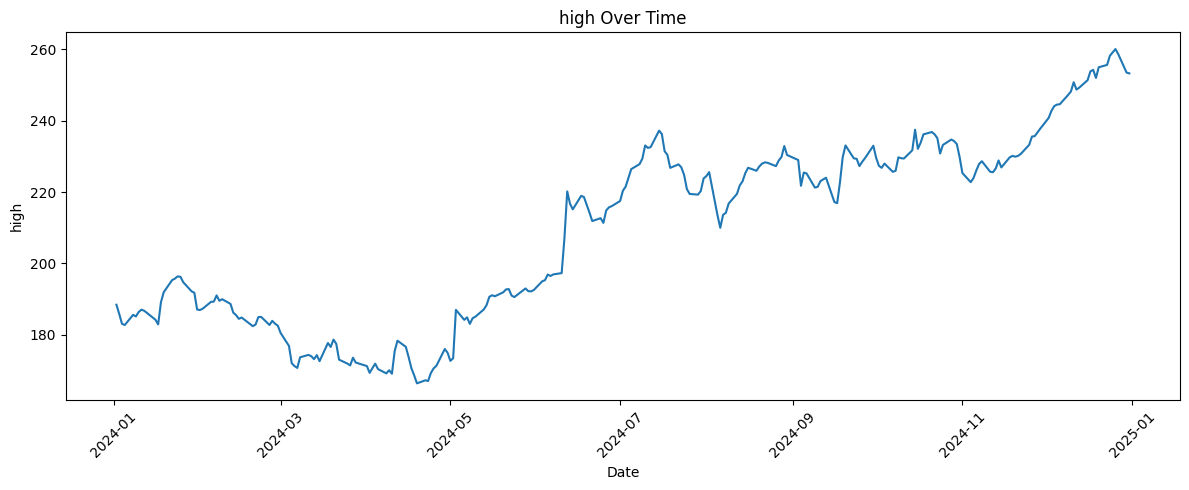

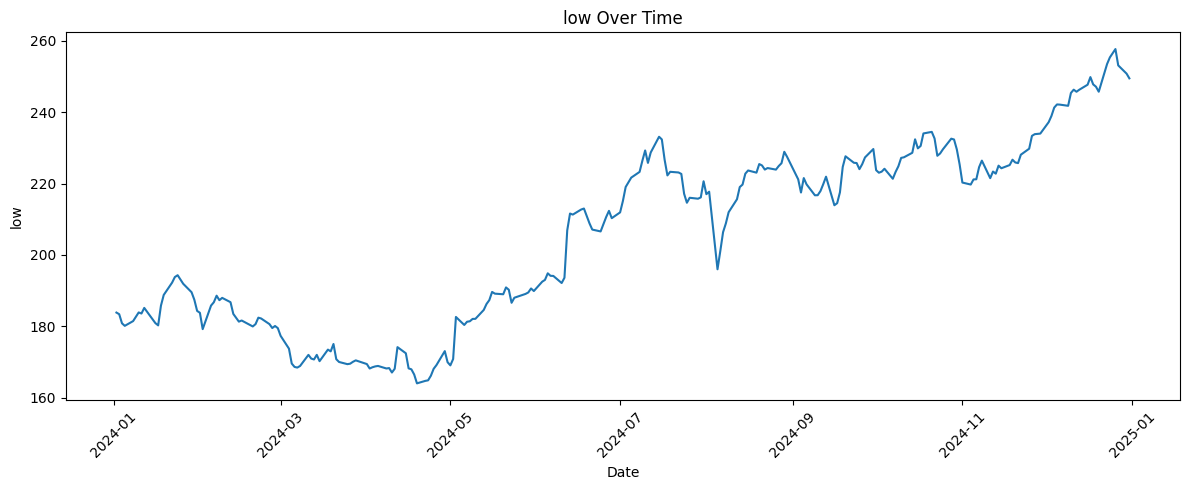

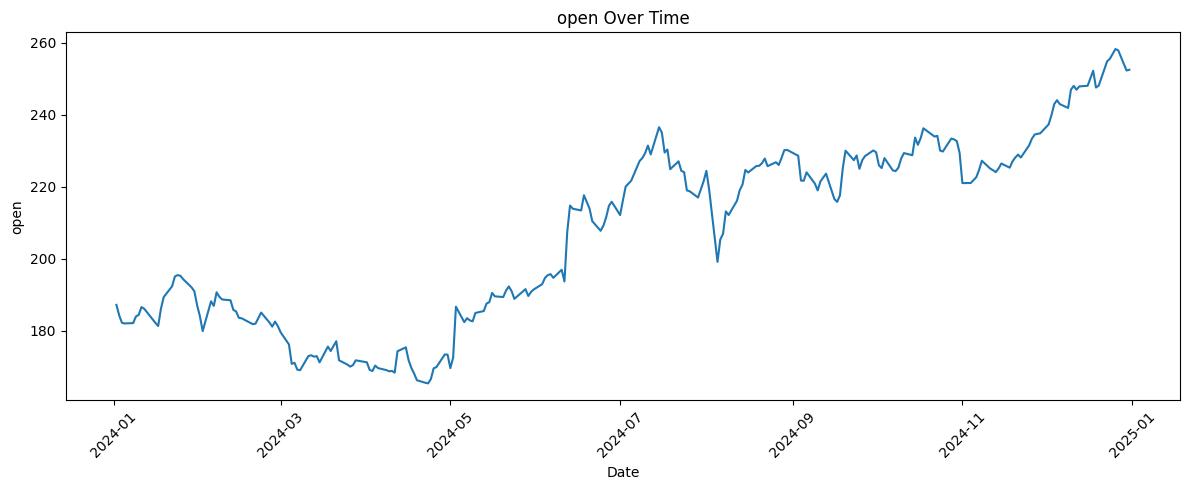

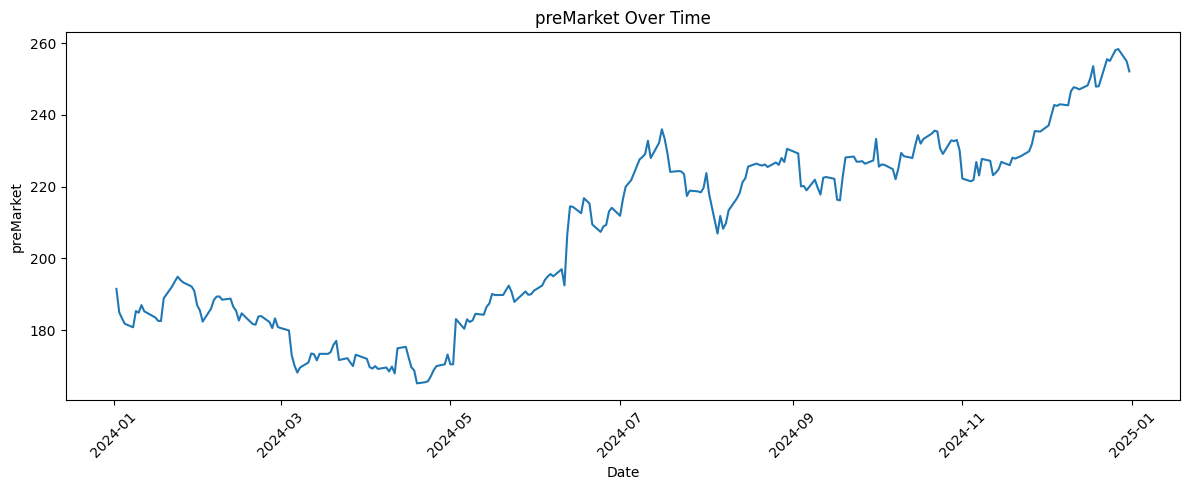

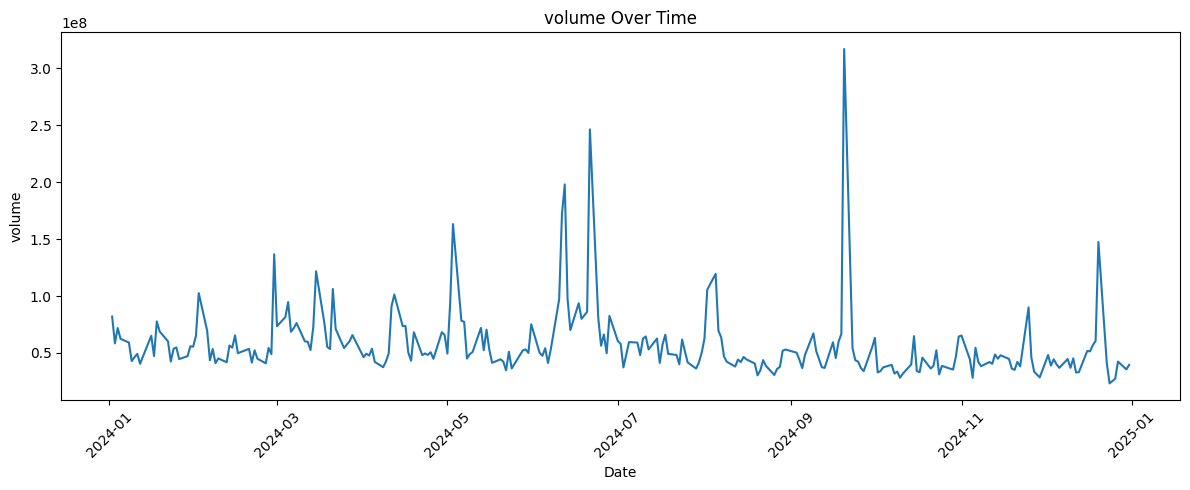

In [7]:
import matplotlib.pyplot as plt

# Ensure 'from' column is datetime and sort by date
cloud_df['from'] = pd.to_datetime(cloud_df['from'])
df = cloud_df.sort_values('from')

# Get all numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot each numeric column as a time series
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.plot(df['from'], df[col])
    plt.title(f"{col} Over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


The time series plots collectively illustrate the behavior of several key stock variables—`afterHours`, `close`, `high`, `low`, `preMarket`, and `volume`—throughout 2024. The price-based variables (`afterHours`, `close`, `high`, `low`, and `preMarket`) all exhibit similar upward trends, especially in the second half of the year, and follow closely aligned patterns with shared peaks and troughs, matches what we found in correlation plots. This visual similarity suggests strong positive correlations among these variables, which is expected given their shared dependence on market conditions. In contrast, `volume` displays a markedly different pattern, characterized by irregular spikes rather than a consistent trajectory. This suggests that trading volume is influenced more by discrete events or market shocks rather than tracking smoothly with price movement, and it likely has weak correlation with the other variables.
